In [3]:
PI = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273

In [304]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo $\pi$

The simplest way to find the $\pi$ number is to simulate the Monte Carlo problem. If we have a square of side $2*r$ and a circle with radiu $r$ inscribed in the square we can thrown darts randomicaly in this space(sample). After many attempts we can compare the number of hits in side de circle and the total trials. 

$$\frac{hits}{ntrials} \aprox \frac{A_c}{A_s}=\frac{\pi r**2}{(2r)**2}$$

In [305]:
def darts(n_trials):
    count_hits = 0
    #random.seed(123) 
    for i in range(n_trials):
        x , y = random.random() , random.random() #random.uniform(0,n) for major than 1
        if (x ** 2 + y ** 2 <= 1):
            count_hits += 1

    return (4 * float(count_hits) / n_trials)
ini = time.time()
A = darts(400000000)
end= time.time()
print(A, end-ini)

KeyboardInterrupt: 

In [6]:
def darts_accuracy(n_trials):
    count_hits = 0
    espectrum_trials = np.linspace(1,n_trials,n_trials) #Give me a vector of all spectrum of tries
    espectrum_hits = np.zeros(n_trials) #it will save the hits/trials
    timeeach = np.zeros(n_trials)
    
    for i in range(n_trials):
        ini = time.time()
        for j in range(int(espectrum_trials[i])):
            x , y = random.random() , random.random() #random.uniform(0,n) for major than 1
            if (x ** 2 + y ** 2 <= 1):
                count_hits += 1  
        end = time.time()
        espectrum_hits[i] = 4 * float(count_hits)/espectrum_trials[i]
        timeeach[i] = end-ini 
        count_hits = 0
    return espectrum_trials, espectrum_hits, timeeach, n_trials

In [7]:
MC = darts_accuracy(10000)

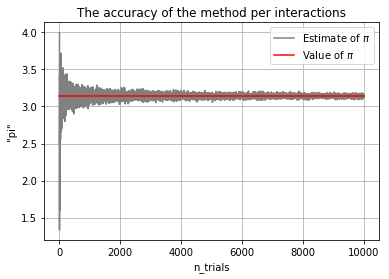

In [8]:
plt.plot(MC[0],MC[1], 'gray', label='Estimate of $\pi$')
plt.plot([0,MC[3]],[PI,PI], 'r', label='Value of $\pi$')
plt.xlabel('n_trials')
plt.ylabel('"pi"')
plt.title("The accuracy of the method per interactions")
plt.legend()
plt.grid()
plt.show()

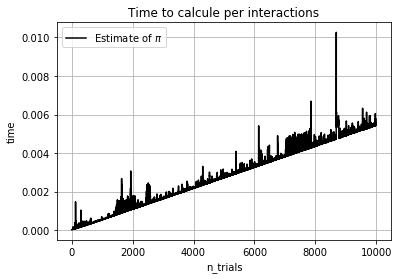

In [9]:
plt.plot(MC[0],MC[2], 'k', label='Estimate of $\pi$')
plt.xlabel('n_trials')
plt.ylabel('time')
plt.title("Time to calcule per interactions")
plt.legend()
plt.grid()
plt.show() 

# Monte Carlo - Markov Chain

Now we have another situation. imagine that we can't reach all the square. To complete all possible space we should make many trials, but now starting in a position that we stopped. if we go out the range, we do another triel from the same position.

In [8]:
def darts_MC(n_trials, reach=0.1):
    x, y, count_hits = 0.5, 0.5, 0.0 #x and y is start position. n_hits is for insede the circle
    for i in range(n_trials):
        reach_x, reach_y = random.uniform(-reach, reach), random.uniform(-reach, reach)
        if abs(x + reach_x) < 1.0 and abs(y + reach_y) < 1.0: #that gives the condition that we'll stay inside the range
            x, y = x + reach_x, y + reach_y
        if x**2 + y**2 < 1.0: 
            count_hits += 1
    
    return 4.0 * count_hits / float(n_trials)

In [9]:
def darts_MC_accuracy(n_trials, reach=0.1):
    x, y, count_hits = 1, 1, 0.0
    espectrum_trials = np.linspace(1,n_trials,n_trials) #Give me a vector of all spectrum of tries
    espectrum_hits = np.zeros(n_trials) #it will save the hits/trials
    timeeach = np.zeros(n_trials)
    
    for i in range(n_trials):
        ini = time.time()
        x, y = 1, 1
        for j in range(int(espectrum_trials[i])):
            reach_x, reach_y = random.uniform(-reach, reach), random.uniform(-reach, reach)
            if abs(x + reach_x) < 1.0 and abs(y + reach_y) < 1.0: #that gives the condition that we are inside the range
                x, y = x + reach_x, y + reach_y
            if x**2 + y**2 < 1.0: 
                count_hits += 1  
        end = time.time()
        espectrum_hits[i] = 4 * float(count_hits)/espectrum_trials[i]
        count_hits = 0
        timeeach[i] = end-ini 
    return espectrum_trials, espectrum_hits, timeeach, n_trials

In [10]:
MChain = darts_MC_accuracy(10000, reach=0.1)

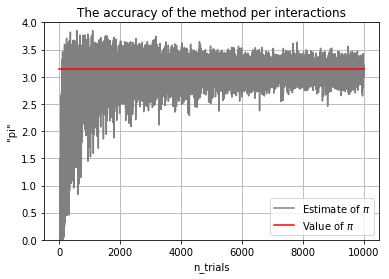

In [11]:
plt.plot(MChain[0],MChain[1], 'gray', label='Estimate of $\pi$')
plt.plot([0,MChain[3]],[PI,PI], 'r', label='Value of $\pi$')
plt.xlabel('n_trials')
plt.ylabel('"pi"')
plt.title("The accuracy of the method per interactions")
plt.ylim(top=4)
plt.ylim(bottom=0)
plt.legend()
plt.grid()
plt.show()

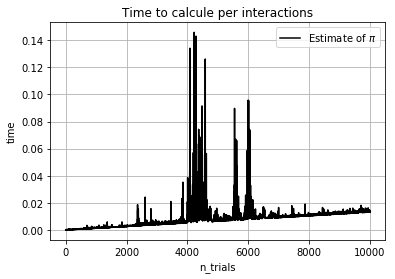

In [12]:
plt.plot(MChain[0],MChain[2], 'k', label='Estimate of $\pi$')
plt.xlabel('n_trials')
plt.ylabel('time')
plt.title("Time to calcule per interactions")
plt.legend()
plt.grid()
plt.show() 